
# Задание к финальному проекту по блоку классического ML

Работаем с [данными](https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv) сервиса проката велосипедов в Корее за год.

Описание данных:
- Date - дата;
- Rented Bike Count - сколько велосипедов было взято в прокат, целевая переменная;
- Hour - час дня;
- Temperature - температура воздуха в градусах Цельсия;
- Humidity - влажность воздуха;
- Wind Speed - скорость ветра в м/с;
- Visibility - мера различимости объектов на расстоянии в 10 метров;
- Dew point temperature -  температура, зарегистрированная в начале дня, в градусах Цельсия;
- Solar Radiation - интенсивность солнечного света;
- Rainfall - количество осадков в мм;
- Snowfall - количество выпавшего снега в мм;
- Seasons - время года;
- Holiday - является ли день праздничным;
- Functioning Day - маркер, работал ли сервис проката в указанное время.

**Цель работы**: изучить данные и выявить факторы влияющие на спрос велосипедов.

**Задачи**:  
1) Провести предобработку данных: проверить данные на наличие выбросов, ошибочных значений, пропусков, дубликатов и некорректных типов.  
2) Провести EDA: реализовать все уровни анализа (одномерные/многомерные) с использованием визуализаций, изучить распределения и взаимосвязь признаков.  
3) Подготовить данные для построения модели (кодирование признаков, масштабирование, разбиение выборки на обучающую и тестовую).  
4) Реализовать базовую регрессионную модель прогнозирования количества велосипедов, взятых в прокат.  
5) При помощи инструментов Feature Selection и подбора гиперпараметров подобрать наилучшую прогнозную модель по adjusted R2 (основная метрика) и RMSE.

Работа должна быть оформлена в виде аналитического отчёта, каждый этап должен сопровождаться выводами.

Обязательный критерий: добиться adjusted R2 не менее 85%.

**Дополнительные** (необязательные) **критерии**:  
1) Использовать пайплайны.  
2) Для оптимизизации гиперпараметров использовать HyperOpt.   
3) Добиться adjusted R2 не менее 89%.    


# **Загрузка и первичный анализ и предобработка данных**

In [1]:
# загружаем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# загружаем данные
url = 'https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv'
df = pd.read_csv(url, encoding='unicode_escape')
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [4]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Пропусков в данных нет, каких-то очевидных аномалий тоже.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Видим 10 числовых переменных, столбец с датой в формате object, 3 категориальных переменных.

In [ ]:
# быстрый и поверхностный взгляд на данные обеспечим библиотекой ydata progiling
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=1b247832750b9f188b772b47920545a75b2af78dff6a90f405800cbb213bc964
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# выгружаем репорт в отдельный файл для изучения закономерностей и структуры данных
from ydata_profiling import ProfileReport
velo_profile = ProfileReport(df, title="Velobike Profiling Report")

velo_profile.to_file("Velobike_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# переименуем названия колонок для удобства и краткости
df.rename(columns = {'Rented Bike Count':'RBC', 'Dew point temperature(°C)':'Dptemp', 'Solar Radiation (MJ/m2)':'Solar', 'Functioning Day':'Func',
                     'Wind speed (m/s)':'W_speed', 'Temperature(°C)':'Temp', 'Visibility (10m)':'Vizibility',
                      'Rainfall(mm)':'Rainfall', 'Snowfall (cm)':'Snowfall', 'Humidity(%)':'Humidity'}, inplace = True )

In [7]:
# выведем список всех колонок
column_names = df.columns.tolist()
column_names

['Date',
 'RBC',
 'Hour',
 'Temp',
 'Humidity',
 'W_speed',
 'Vizibility',
 'Dptemp',
 'Solar',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Func']

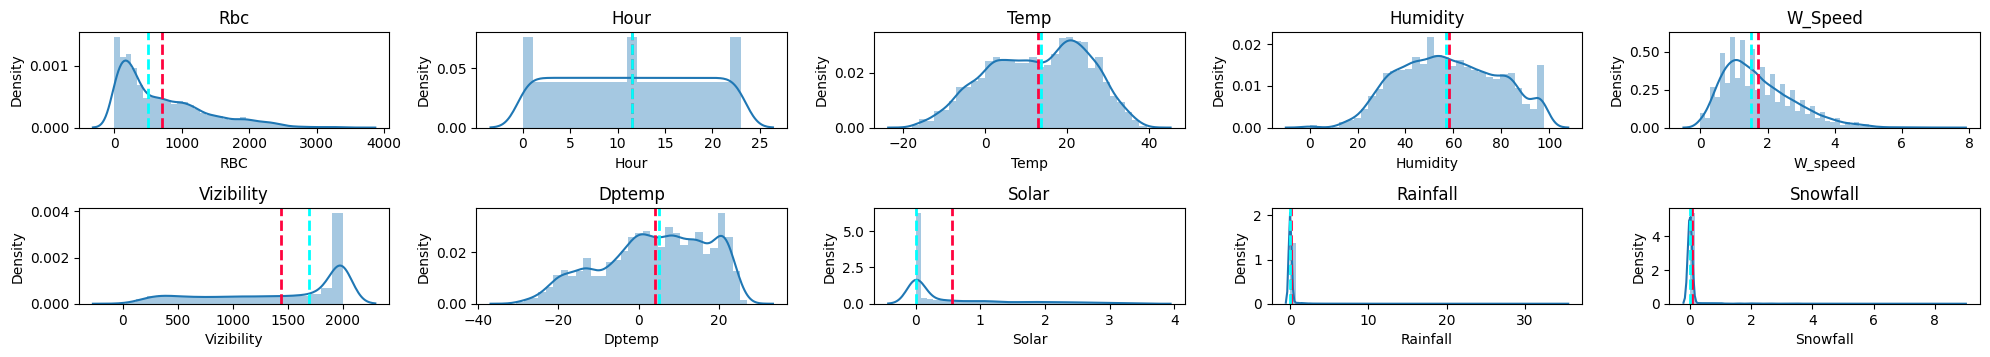

In [8]:
# для числовых переменных построим гистограммы

numerical_var = [ 'RBC', 'Hour', 'Temp', 'Humidity', 'W_speed', 'Vizibility', 'Dptemp', 'Solar', 'Rainfall', 'Snowfall']

fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_var) :
  plt.subplot(3,5,index+1)
  sns.distplot(df[column])
  feature = df[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')
  plt.tight_layout()

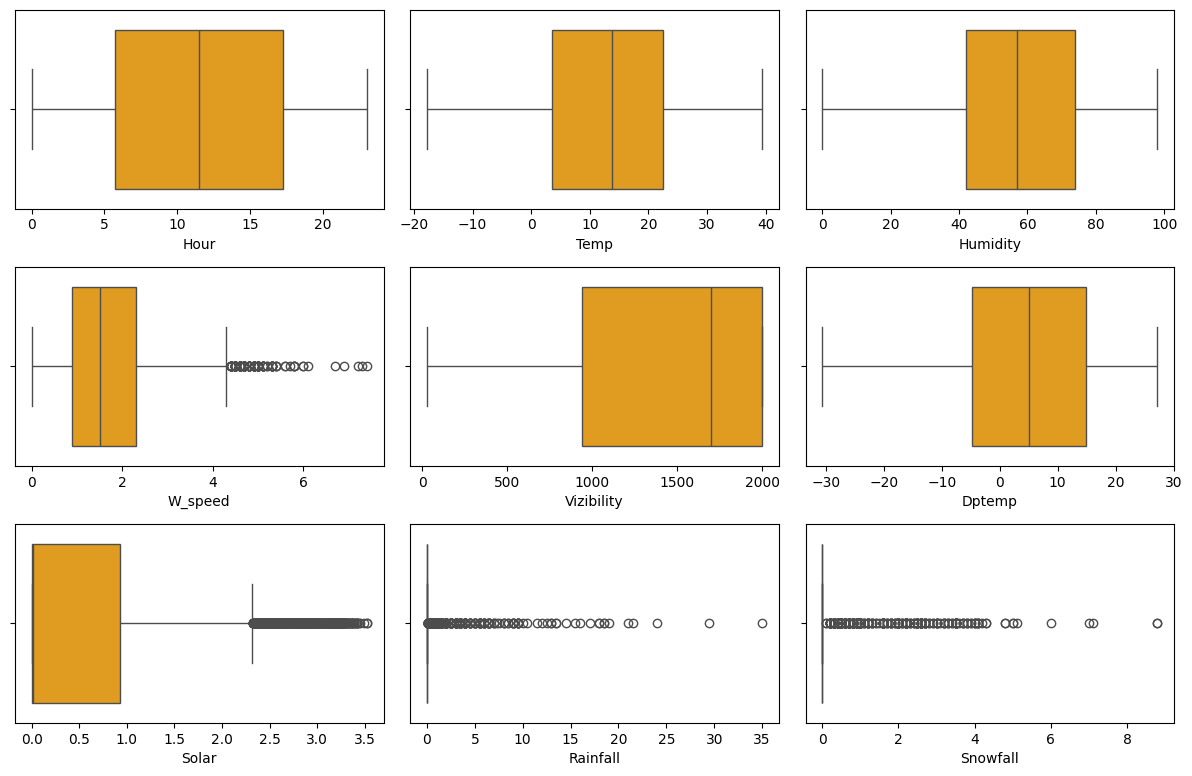

In [9]:
numerical_var = [ 'RBC', 'Hour', 'Temp', 'Humidity', 'W_speed', 'Vizibility', 'Dptemp', 'Solar', 'Rainfall', 'Snowfall']
plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_var[1:], start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=col, data=df, color="orange", orient='y')
plt.tight_layout()

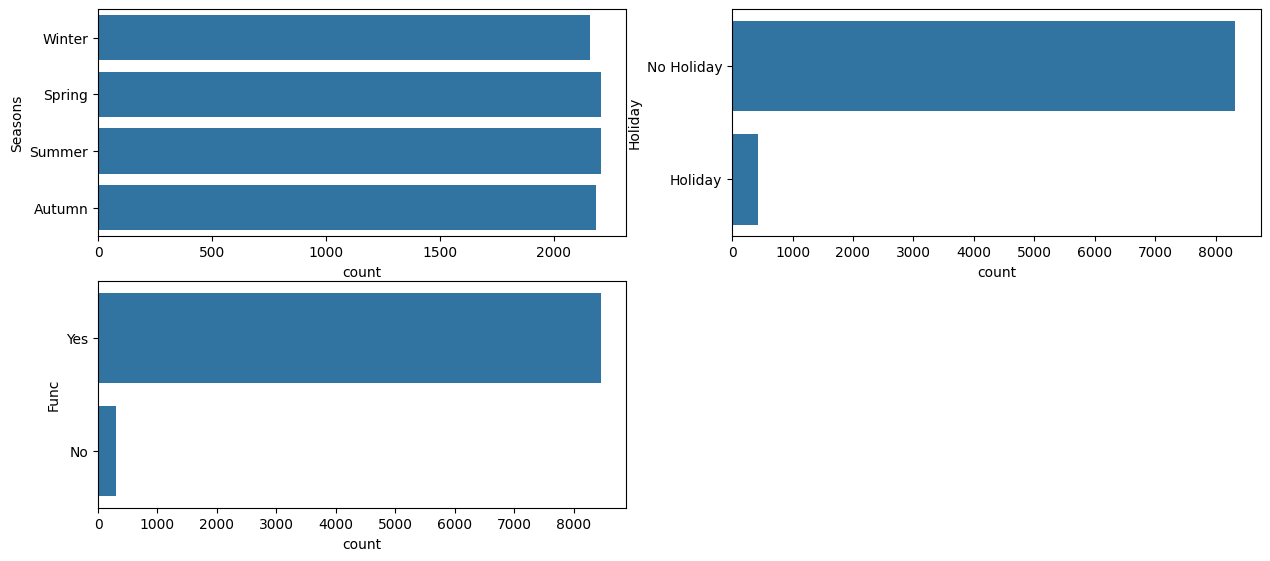

In [10]:
# столбчатая диаграмма для категориальных признаков, с датой поработаем отдельно
categorical_var =  [ 'Seasons', 'Holiday', 'Func']

plt.figure(figsize=(15, 10))

for index,column in enumerate(categorical_var) :
  plt.subplot(3,2,index+1)
  sns.countplot(df[column])
  feature = df[column]

In [10]:
# заметим, что в датасете есть данные за дни, когда прокат не функционирует. проверим кол-во забронированных велобайков
df.query('Func == "No"')['RBC'].sum()

0

In [11]:
# так как в эти дни велобайки не бронируют, а предсказать эту целевую переменную - смысл работы, удалим эти строки и колонку
df = df.drop(df[df['Func'] == 'No'].index)
df = df.drop(['Func'], axis = 1)

In [12]:
# проверим на дубликаты
len(df[df.duplicated()])

0

In [13]:
# итак, финальный вид нашего датасета, перед тем как начать исследовать внутренние зависимости:
df.shape

(8465, 13)

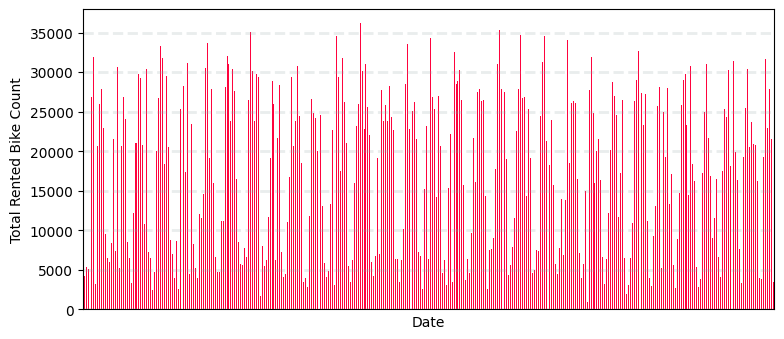

In [15]:
# работаем с датой. для начала взглянем как аренда байков распределена по времени
plt.figure(figsize=(15, 10))
plt.subplot(3,2, index+1)
dataset=df.copy()
dataset.groupby('Date')['RBC'].sum().plot(kind='bar',color="#ff033e")
ax = fig.gca()
plt.xticks([])
plt.ylabel('Total Rented Bike Count')
plt.tight_layout()
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)

In [9]:
# ряд можно попробовать спрогнозировать
# переведем дату из формата object в datetime
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")

In [14]:
# оставим колонку с датой, выделим год, месяц, день месяца, день недели
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Weekday']=df['Date'].dt.weekday

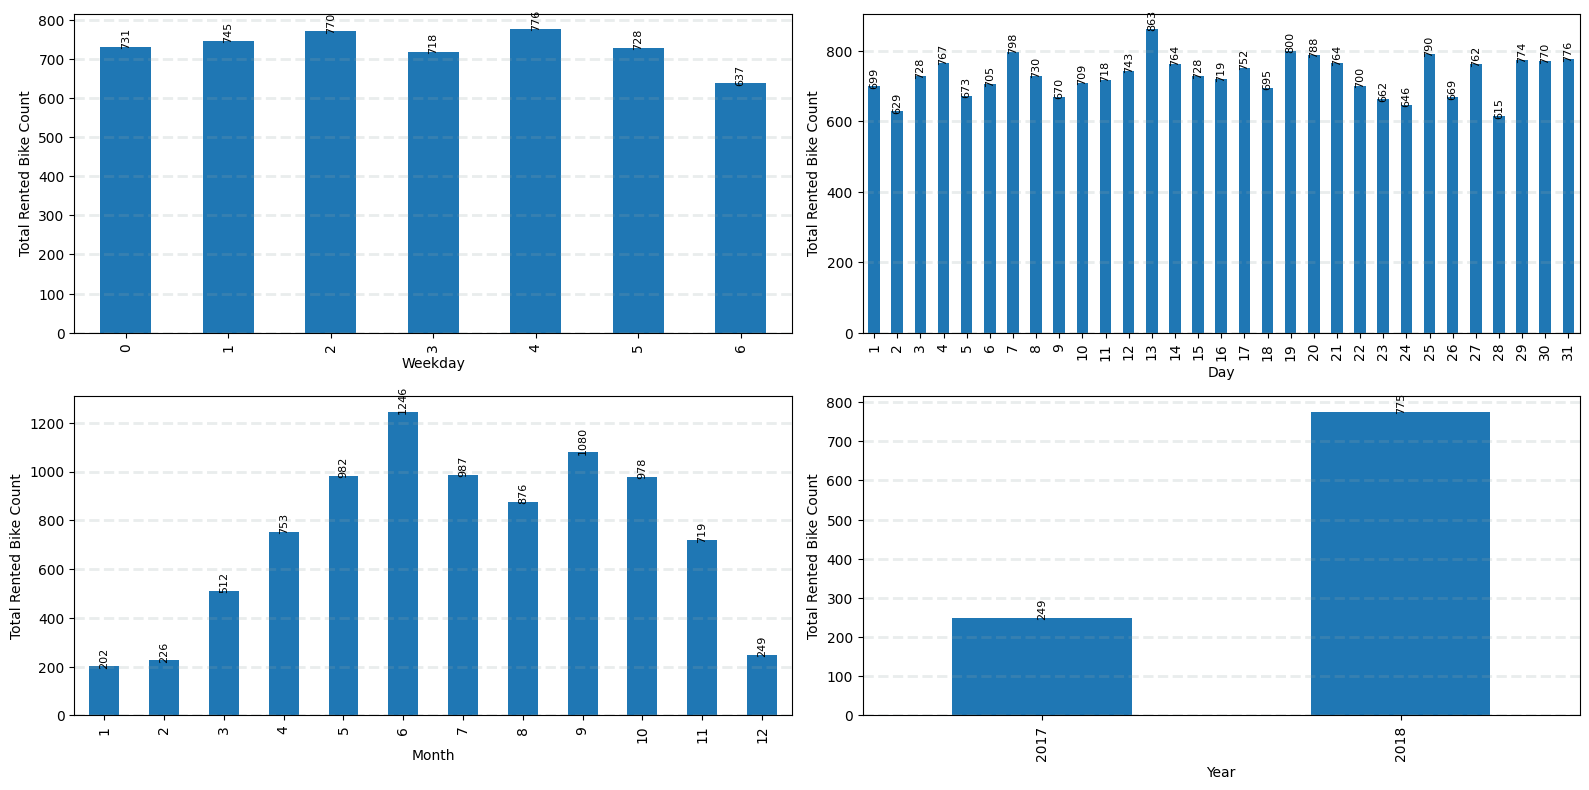

In [16]:
# посмотрим как рапределена аренда велобайков по дням недели, месяцам, годам, дням месяца в отдельности
date_features=['Weekday', 'Day', 'Month', 'Year']

fig = plt.figure(figsize = (16,8))
for index,column in enumerate(date_features) :
  plt.subplot(2,2,index+1)
  dataset=df.copy()
  feature = df[column]
  dataset.groupby(feature)['RBC'].mean().plot(kind='bar')

  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 8, rotation=90) #

In [ ]:
# в 2017 в целом попала часть зимы, а в основном в датасете представлен 2018 год, чтои дает ему больший вес
# слабовыраженная закономерности по дням недели. равзе что в выходные дни аренды меньше. в будни люди едут на работу и на графике в tableau видно, что в будни ярко выражынные пики в 8 и 18 ч дня
# видим ярко выраженную сезонность

# **Исследование зависимостей и отбор признаков**

In [101]:
import sklearn

In [103]:
pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.4 MB/s eta 0:00:00


In [104]:
import phik
from phik.report import plot_correlation_matrix

In [ ]:
phik_overview = df.phik_matrix()
phik_overview

interval columns not set, guessing: ['RBC', 'Hour', 'Temp', 'Humidity', 'W_speed', 'Vizibility', 'Dptemp', 'Solar', 'Rainfall', 'Snowfall', 'Day', 'Month', 'Year', 'Weekday']


Date       RBC      Hour      Temp  Humidity   W_speed  \
Date        1.000000  0.618526  0.000000  0.939281  0.807092  0.652435   
RBC         0.618526  1.000000  0.621802  0.619933  0.328878  0.223270   
Hour        0.000000  0.621802  1.000000  0.268404  0.502095  0.464493   
Temp        0.939281  0.619933  0.268404  1.000000  0.419250  0.246517   
Humidity    0.807092  0.328878  0.502095  0.419250  1.000000  0.379299   
W_speed     0.652435  0.223270  0.464493  0.246517  0.379299  1.000000   
Vizibility  0.813879  0.264860  0.183815  0.371043  0.594728  0.201432   
Dptemp      0.968690  0.491661  0.051958  0.892736  0.573059  0.285859   
Solar       0.361079  0.476073  0.724860  0.397278  0.485157  0.366276   
Rainfall    0.360591  0.052754  0.000000  0.050705  0.246792  0.000000   
Snowfall    0.843277  0.172815  0.057399  0.350724  0.200663  0.134109   
Seasons     1.000000  0.516791  0.000000  0.813115  0.300713  0.181557   
Holiday     1.000000  0.126982  0.000000  0.195646  0.105541  0.070342   
Day         1.000000  0.073415  0.000000  0.309942  0.199790  0.165173   
Month       1.000000  0.568073  0.000000  0.850329  0.401916  0.223734   
Year        1.000000  0.356752  0.000000  0.595325  0.079197  0.051749   
Weekday     1.000000  0.062340  0.000000  0.099542  0.129610  0.097270   

            Vizibility    Dptemp     Solar  Rainfall  Snowfall   Seasons  \
Date          0.813879  0.968690  0.361079  0.360591  0.843277  1.000000   
RBC           0.264860  0.491661  0.476073  0.052754  0.172815  0.516791   
Hour          0.183815  0.051958  0.724860  0.000000  0.057399  0.000000   
Temp          0.371043  0.892736  0.397278  0.050705  0.350724  0.813115   
Humidity      0.594728  0.573059  0.485157  0.246792  0.200663  0.300713   
W_speed       0.201432  0.285859  0.366276  0.000000  0.134109  0.181557   
Vizibility    1.000000  0.424145  0.213938  0.145861  0.250600  0.224354   
Dptemp        0.424145  1.000000  0.206302  0.080470  0.294550  0.794925   
Solar         0.213938  0.206302  1.000000  0.000000  0.041919  0.218867   
Rainfall      0.145861  0.080470  0.000000  1.000000  0.164338  0.041147   
Snowfall      0.250600  0.294550  0.041919  0.164338  1.000000  0.248524   
Seasons       0.224354  0.794925  0.218867  0.041147  0.248524  1.000000   
Holiday       0.089667  0.154418  0.000000  0.000000  0.029927  0.178907   
Day           0.234124  0.412941  0.054891  0.037632  0.294012  0.034047   
Month         0.392998  0.845171  0.288903  0.051583  0.302744  0.985839   
Year          0.168791  0.488503  0.180806  0.000000  0.358050  0.736975   
Weekday       0.120385  0.177366  0.034893  0.024287  0.114400  0.014585   

             Holiday       Day     Month      Year   Weekday  
Date        1.000000  1.000000  1.000000  1.000000  1.000000  
RBC         0.126982  0.073415  0.568073  0.356752  0.062340  
Hour        0.000000  0.000000  0.000000  0.000000  0.000000  
Temp        0.195646  0.309942  0.850329  0.595325  0.099542  
Humidity    0.105541  0.199790  0.401916  0.079197  0.129610  
W_speed     0.070342  0.165173  0.223734  0.051749  0.097270  
Vizibility  0.089667  0.234124  0.392998  0.168791  0.120385  
Dptemp      0.154418  0.412941  0.845171  0.488503  0.177366  
Solar       0.000000  0.054891  0.288903  0.180806  0.034893  
Rainfall    0.000000  0.037632  0.051583  0.000000  0.024287  
Snowfall    0.029927  0.294012  0.302744  0.358050  0.114400  
Seasons     0.178907  0.034047  0.985839  0.736975  0.014585  
Holiday     1.000000  0.275284  0.184655  0.180707  0.058950  
Day         0.275284  1.000000  0.072933  0.000000  0.090719  
Month       0.184655  0.072933  1.000000  0.866085  0.070455  
Year        0.180707  0.000000  0.866085  1.000000  0.017367  
Weekday     0.058950  0.090719  0.070455  0.017367  1.000000

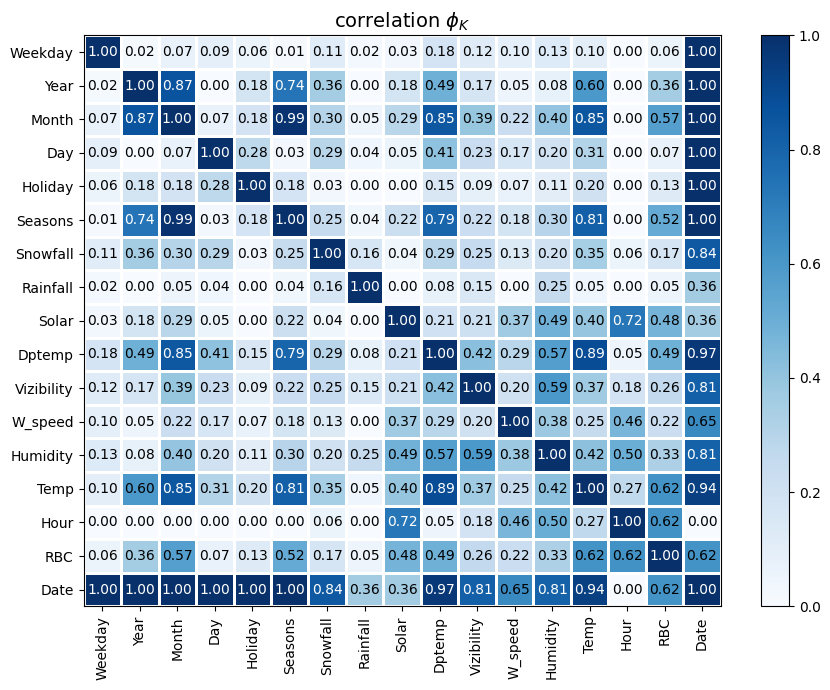

In [ ]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(9,7))
plt.tight_layout()

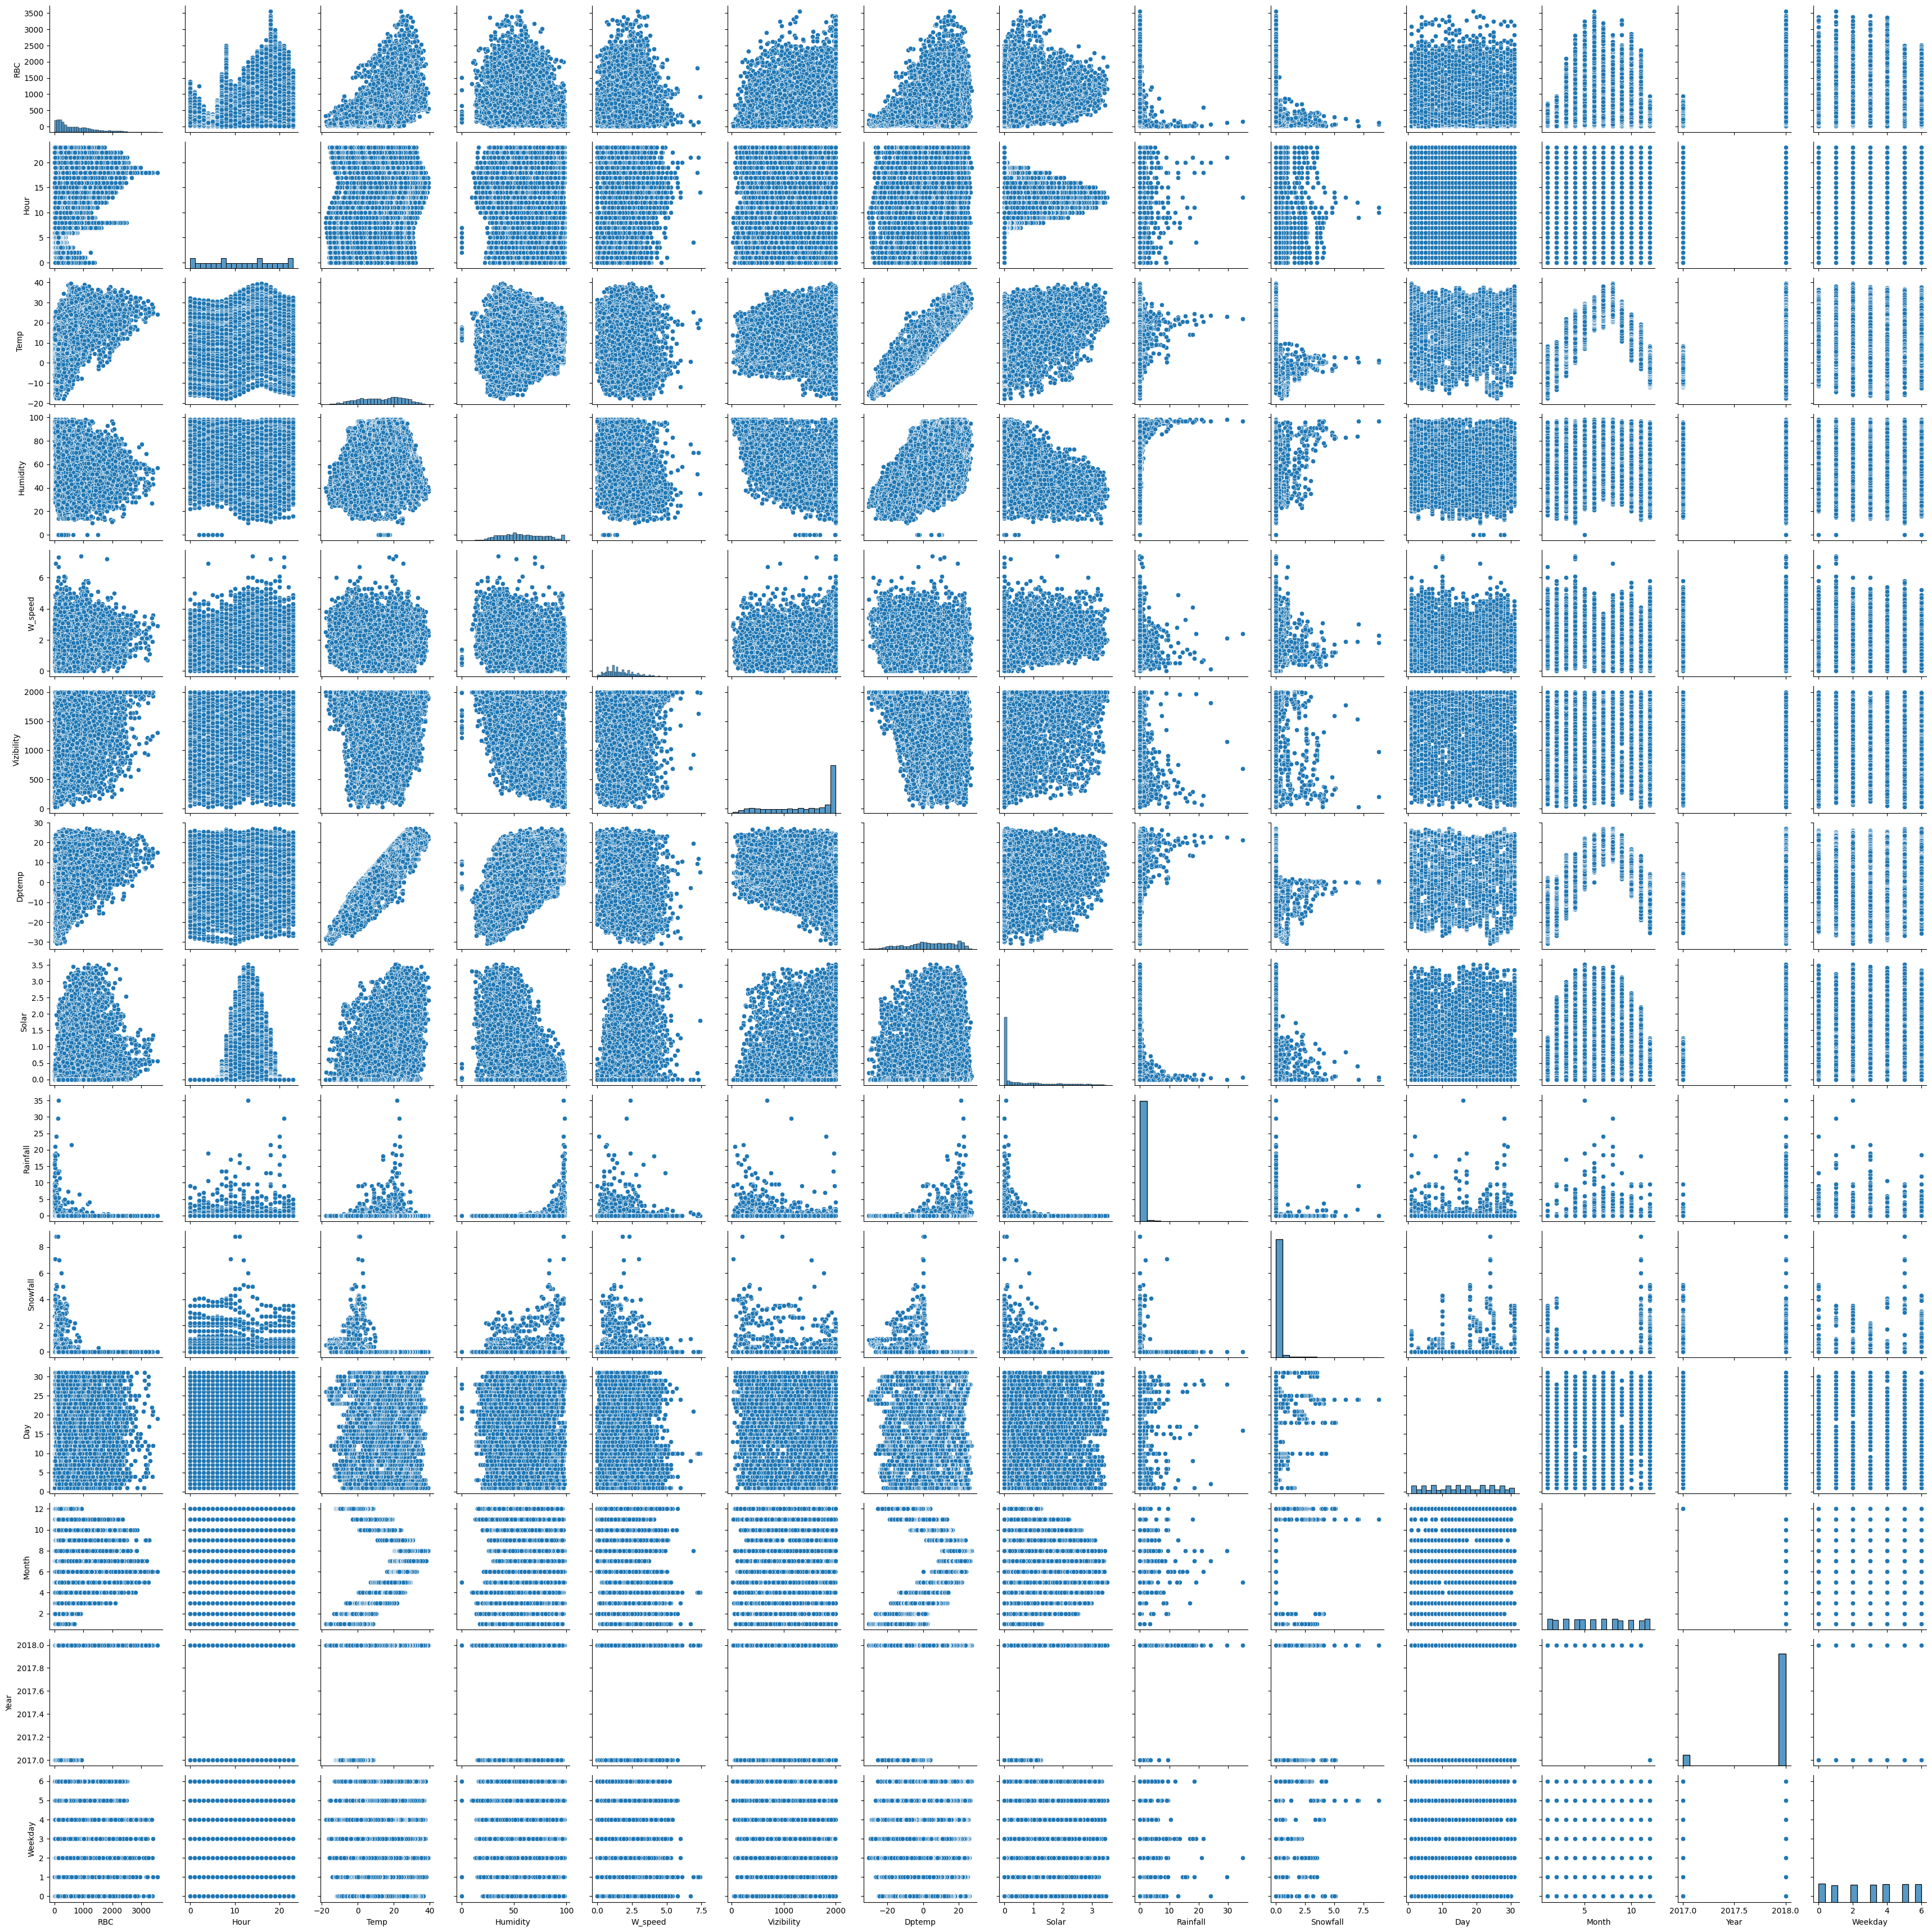

In [ ]:
sns.pairplot(df)

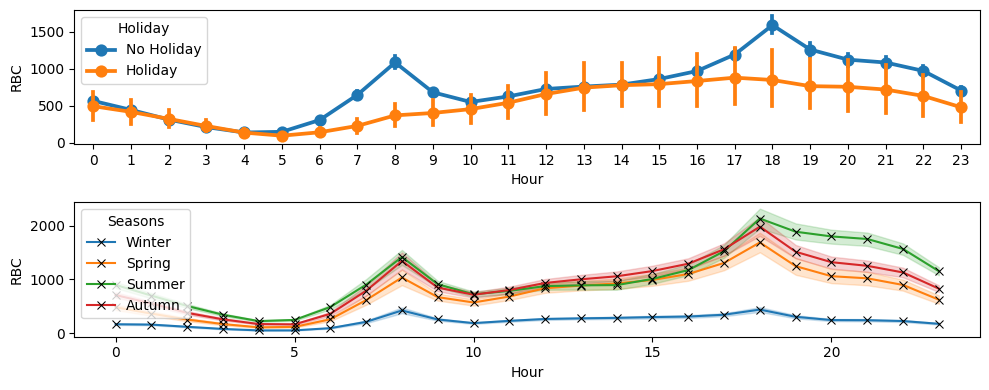

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(10,4), dpi=100)
sns.pointplot(data=df, x="Hour", y="RBC", ax=axs[0],
              hue="Holiday")
sns.lineplot(data=df, x="Hour", y="RBC", ax=axs[1],
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

In [ ]:
# видим ярко выраженную сезонность. лето и весна - сезоны с самым высоким спросом
# в будние дни ярко выраженный пик в 8 и 8 часов (время отправки на работу и домой, люди используют велобайк в качестве транспорта)
# в выходной день аренда тоже зависит от времени дня, но острых пиков нет

### **Отбор признаков**

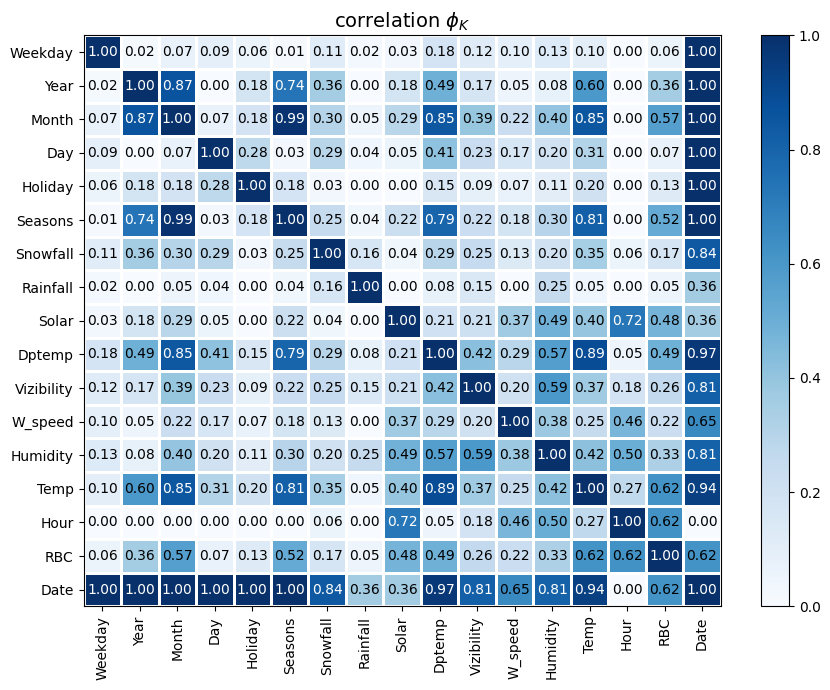

In [ ]:
# произведем отбор признаков для модели - взглядем еще раз на корреляции
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(9,7))
plt.tight_layout()

In [ ]:
# убираем признак Date, связь не имеет смысла
# убираем Year, так как с ростом года у нас растет прокат, но это по причине того, что в 2018 год попали более теплые времена года,
# далее эта связь не сработает
# необходимо оставить либо month, либо seasons, они слишком сильно коррелируют и имеют очень похожие связи с другими факторами
# очевидно, что месяц или сезон очень сильно влияют на наличие снегопада, солнечного света, видимость, влажность, температуру и другие
# погодные условия. все эти корреляции в разумных пределах, кроме связи с температурой - потенциальный кандидат на удаление
# температура в начале дня и температура - очень высокая корреляция, избавляемся от одного из признаков

In [19]:
# сформируем новый датасет только с нужными признаками
df1 = df.drop(['Dptemp'], axis = 1)
df1 = df1.drop(['Year'], axis = 1)
df1 = df1.drop(['Date'], axis = 1)
df1 = df1.drop(['Month'], axis = 1) #выбор между month и seasons пал на удаление month, т.к. он сильнее коррелирует с другими признаками,
# что увеличивает негативные последствия МК

# **Разделение на train и test, кодирование и масштабирование данных**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('RBC', axis=1), df['RBC'], random_state=42)

In [21]:
# проверим размеры выборок
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (6348, 12) (6348,)
Test: (2117, 12) (2117,)


In [22]:
X_train

Hour  Temp  Humidity  W_speed  Vizibility  Solar  Rainfall  Snowfall  \
1164    12   2.5        72      2.4         256   0.00       0.0       0.0   
4803     3  19.9        69      1.4        1179   0.00       0.0       0.0   
1450    10  -7.5        42      0.9        1705   0.55       0.0       0.0   
3881    17  18.9        45      2.6        1084   0.80       0.0       0.0   
7447     7  14.3        89      0.6        1165   0.03       0.0       0.0   
...    ...   ...       ...      ...         ...    ...       ...       ...   
5782    22  30.4        45      1.6        2000   0.00       0.0       0.0   
5239     7  19.6        57      1.6        2000   0.42       0.0       0.0   
5438    14  32.4        50      2.0        1735   3.13       0.0       0.0   
860     20  -3.4        51      1.1        1391   0.00       0.0       0.0   
7469     5   9.8        63      0.5        2000   0.00       0.0       0.0   

     Seasons     Holiday  Day  Weekday  
1164  Winter  No Holiday   18        3  
4803  Summer  No Holiday   19        1  
1450  Winter  No Holiday   30        1  
3881  Spring  No Holiday   11        4  
7447  Autumn  No Holiday    7        6  
...      ...         ...  ...      ...  
5782  Summer  No Holiday   29        6  
5239  Summer  No Holiday    7        5  
5438  Summer  No Holiday   15        6  
860   Winter  No Holiday    5        4  
7469  Autumn  No Holiday    8        0  

[6348 rows x 12 columns]

In [23]:
X_train_temp = X_train.drop(['Seasons','Holiday'], axis =1)

In [24]:
X_test_temp = X_test.drop(['Seasons','Holiday'], axis =1)

In [25]:
# стандартизируем все признаки, кроме категориальных seasons и holiday
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_temp = pd.DataFrame(scaler.fit_transform(X_train_temp), columns=X_train_temp.columns)
X_test_temp = pd.DataFrame(scaler.transform(X_test_temp), columns=X_test_temp.columns)

In [26]:
# кодируем признаки seasons и holiday
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

# Обучение кодировщика на обучающей выборке и преобразование признаков
encoded_columns = encoder.fit_transform(X_train[['Seasons', 'Holiday']])
encoded_columns_test = encoder.transform(X_test[['Seasons', 'Holiday']])

In [27]:
X_train = pd.concat([X_train_temp.reset_index(drop=True), pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Seasons', 'Holiday']))], axis=1)
X_test = pd.concat([X_test_temp.reset_index(drop=True), pd.DataFrame(encoded_columns_test, columns=encoder.get_feature_names_out(['Seasons', 'Holiday']))], axis=1)

X_train

Hour      Temp  Humidity   W_speed  Vizibility     Solar  Rainfall  \
0     0.076163 -0.856776  0.663487  0.649612   -1.916657 -0.654962 -0.135695   
1    -1.229368  0.591060  0.517440 -0.317993   -0.407986 -0.654962 -0.135695   
2    -0.213955 -1.688866 -0.796988 -0.801795    0.451776 -0.019816 -0.135695   
3     0.801457  0.507851 -0.650941  0.843133   -0.563267  0.268887 -0.135695   
4    -0.649132  0.125090  1.491090 -1.092077   -0.430870 -0.620318 -0.135695   
...        ...       ...       ...       ...         ...       ...       ...   
6343  1.526752  1.464755 -0.650941 -0.124472    0.933963 -0.654962 -0.135695   
6344 -0.649132  0.566098 -0.066751 -0.124472    0.933963 -0.169942 -0.135695   
6345  0.366281  1.631173 -0.407528  0.262570    0.500812  2.959597 -0.135695   
6346  1.236634 -1.347709 -0.358846 -0.608274   -0.061466 -0.654962 -0.135695   
6347 -0.939250 -0.249350  0.225345 -1.188837    0.933963 -0.654962 -0.135695   

      Snowfall       Day   Weekday  Seasons_Autumn  Seasons_Spring  \
0    -0.175249  0.242958 -0.010511             0.0             0.0   
1    -0.175249  0.357203 -1.006378             0.0             0.0   
2    -0.175249  1.613891 -1.006378             0.0             0.0   
3    -0.175249 -0.556753  0.487423             0.0             1.0   
4    -0.175249 -1.013730  1.483290             1.0             0.0   
...        ...       ...       ...             ...             ...   
6343 -0.175249  1.499647  1.483290             0.0             0.0   
6344 -0.175249 -1.013730  0.985357             0.0             0.0   
6345 -0.175249 -0.099775  1.483290             0.0             0.0   
6346 -0.175249 -1.242219  0.487423             0.0             0.0   
6347 -0.175249 -0.899486 -1.504312             1.0             0.0   

      Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  
0                0.0             1.0              0.0                 1.0  
1                1.0             0.0              0.0                 1.0  
2                0.0             1.0              0.0                 1.0  
3                0.0             0.0              0.0                 1.0  
4                0.0             0.0              0.0                 1.0  
...              ...             ...              ...                 ...  
6343             1.0             0.0              0.0                 1.0  
6344             1.0             0.0              0.0                 1.0  
6345             1.0             0.0              0.0                 1.0  
6346             0.0             1.0              0.0                 1.0  
6347             0.0             0.0              0.0                 1.0  

[6348 rows x 16 columns]

In [28]:
# так как мы будем решать задачу регрессии, уберем по одному столбцу для каждого категориального признака во избежание МК
X_train = X_train.drop(['Seasons_Autumn', 'Holiday_No Holiday'], axis=1)
X_test = X_test.drop(['Seasons_Autumn', 'Holiday_No Holiday'], axis=1)

X_train

Hour      Temp  Humidity   W_speed  Vizibility     Solar  Rainfall  \
0     0.076163 -0.856776  0.663487  0.649612   -1.916657 -0.654962 -0.135695   
1    -1.229368  0.591060  0.517440 -0.317993   -0.407986 -0.654962 -0.135695   
2    -0.213955 -1.688866 -0.796988 -0.801795    0.451776 -0.019816 -0.135695   
3     0.801457  0.507851 -0.650941  0.843133   -0.563267  0.268887 -0.135695   
4    -0.649132  0.125090  1.491090 -1.092077   -0.430870 -0.620318 -0.135695   
...        ...       ...       ...       ...         ...       ...       ...   
6343  1.526752  1.464755 -0.650941 -0.124472    0.933963 -0.654962 -0.135695   
6344 -0.649132  0.566098 -0.066751 -0.124472    0.933963 -0.169942 -0.135695   
6345  0.366281  1.631173 -0.407528  0.262570    0.500812  2.959597 -0.135695   
6346  1.236634 -1.347709 -0.358846 -0.608274   -0.061466 -0.654962 -0.135695   
6347 -0.939250 -0.249350  0.225345 -1.188837    0.933963 -0.654962 -0.135695   

      Snowfall       Day   Weekday  Seasons_Spring  Seasons_Summer  \
0    -0.175249  0.242958 -0.010511             0.0             0.0   
1    -0.175249  0.357203 -1.006378             0.0             1.0   
2    -0.175249  1.613891 -1.006378             0.0             0.0   
3    -0.175249 -0.556753  0.487423             1.0             0.0   
4    -0.175249 -1.013730  1.483290             0.0             0.0   
...        ...       ...       ...             ...             ...   
6343 -0.175249  1.499647  1.483290             0.0             1.0   
6344 -0.175249 -1.013730  0.985357             0.0             1.0   
6345 -0.175249 -0.099775  1.483290             0.0             1.0   
6346 -0.175249 -1.242219  0.487423             0.0             0.0   
6347 -0.175249 -0.899486 -1.504312             0.0             0.0   

      Seasons_Winter  Holiday_Holiday  
0                1.0              0.0  
1                0.0              0.0  
2                1.0              0.0  
3                0.0              0.0  
4                0.0              0.0  
...              ...              ...  
6343             0.0              0.0  
6344             0.0              0.0  
6345             0.0              0.0  
6346             1.0              0.0  
6347             0.0              0.0  

[6348 rows x 14 columns]

In [29]:
X_train.describe()

Hour          Temp      Humidity       W_speed    Vizibility  \
count  6.348000e+03  6.348000e+03  6.348000e+03  6.348000e+03  6.348000e+03   
mean   1.068948e-16 -7.499427e-17  1.667783e-16  1.387954e-16  1.452314e-16   
std    1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00   
min   -1.664544e+00 -2.520956e+00 -2.841654e+00 -1.672640e+00 -2.290965e+00   
25%   -7.941908e-01 -8.068506e-01 -7.969883e-01 -8.017951e-01 -8.231570e-01   
50%   -6.889614e-02  5.852287e-02 -6.675057e-02 -2.212322e-01  4.092785e-01   
75%    8.014574e-01  8.157246e-01  7.608522e-01  5.528518e-01  9.323280e-01   
max    1.671811e+00  2.205315e+00  1.929232e+00  5.487637e+00  9.339626e-01   

              Solar      Rainfall      Snowfall           Day       Weekday  \
count  6.348000e+03  6.348000e+03  6.348000e+03  6.348000e+03  6.348000e+03   
mean   3.385935e-17  8.954540e-18 -5.988349e-17 -8.954540e-17 -1.678976e-17   
std    1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00   
min   -6.549625e-01 -1.356945e-01 -1.752492e-01 -1.699197e+00 -1.504312e+00   
25%   -6.549625e-01 -1.356945e-01 -1.752492e-01 -8.994858e-01 -1.006378e+00   
50%   -6.434144e-01 -1.356945e-01 -1.752492e-01  1.446952e-02 -1.051089e-02   
75%    3.959158e-01 -1.356945e-01 -1.752492e-01  8.141805e-01  9.853566e-01   
max    3.409973e+00  3.153634e+01  1.927606e+01  1.728136e+00  1.483290e+00   

       Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_Holiday  
count     6348.000000     6348.000000     6348.000000      6348.000000  
mean         0.260397        0.256931        0.251418         0.049464  
std          0.438886        0.436976        0.433862         0.216853  
min          0.000000        0.000000        0.000000         0.000000  
25%          0.000000        0.000000        0.000000         0.000000  
50%          0.000000        0.000000        0.000000         0.000000  
75%          1.000000        1.000000        1.000000         0.000000  
max          1.000000        1.000000        1.000000         1.000000

# **Моделирование целевой переменной**

### Линейная регрессия

Начнем с построения базовой модели линейной регресси. Далее пойдем на усложнение, добавляя валидацию, пайплайны и подбор гиперпараметров

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [31]:
# построим линейную регрессию на данных
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_train_predict = lr_model.predict(X_train)

y_test_predict = lr_model.predict(X_test)

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")

Train R^2: 0.5391912198817862
Test R^2: 0.554276237960688


Применим регуляризацию Lasso:

In [33]:
from sklearn.linear_model import Lasso

alpha_list = np.linspace(0, 20, 30)

train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr = Lasso(alpha=alpha)
    # Обучаем модель
    lasso_lr.fit(X_train, y_train)
    # Делаем предсказание для тренировочной выборки
    y_train_predict = lasso_lr.predict(X_train)
    # Делаем предсказание для тестовой выборки
    y_test_predict = lasso_lr.predict(X_test)
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(r2_score(y_test, y_test_predict))

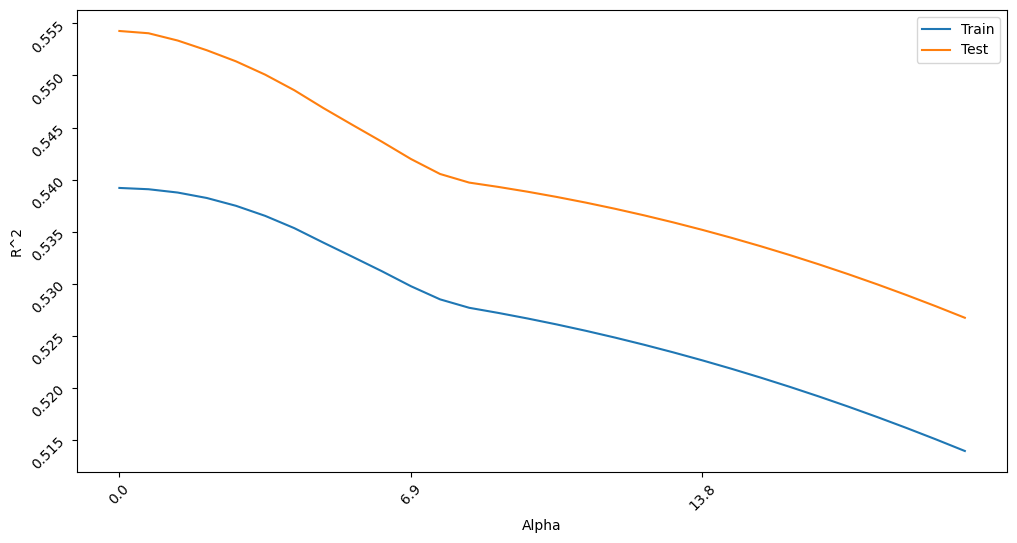

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_list, train_scores, label='Train')
plt.plot(alpha_list, test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.xticks(alpha_list[::10])
plt.tick_params(rotation=45)
plt.legend()
plt.show()

Регуляризация не даёт улучшений в целевой метрике R2, проверим полиномиальную зависимость

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Создаём генератор полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)

# Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)

# Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_predict_poly = model.predict(X_train_poly)
y_test_predict_poly = model.predict(X_test_poly)

print(f"Train R^2: {r2_score(y_train, y_train_predict_poly)}")
print(f"Test R^2: {r2_score(y_test, y_test_predict_poly)}")

Train R^2: 0.7082079624448776
Test R^2: 0.701148004192591


In [36]:
# проверяю отдельно lasso регуляризацию
# Создаём список из 30 возможных значений от 0 до 2000
alpha_list = np.linspace(0, 10, 30)

# Создаём пустые списки, в которые будем добавлять результаты
train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = Lasso(alpha=alpha)
    # Обучаем модель
    lasso_lr_poly.fit(X_train_poly, y_train)
    # Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_poly)
    # Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_poly)
    # Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(r2_score(y_train, y_train_predict_poly))
    test_scores.append(r2_score(y_test, y_test_predict_poly))

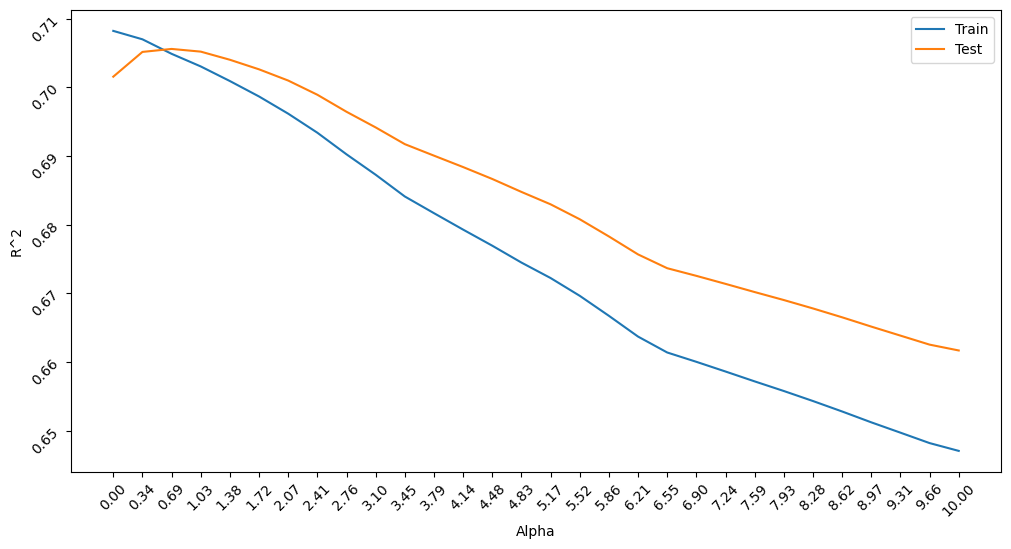

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_list, train_scores, label='Train')
plt.plot(alpha_list, test_scores, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.xticks(alpha_list)
plt.tick_params(rotation=45)
plt.legend()
plt.show()

С полиномиальной регрессией результат лучше, но всё еще очень далек от цели

### Дерево решений

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

Начинаем с простого дерева решений, далее подберем гиперпараметры

In [39]:
dt = tree.DecisionTreeRegressor(
    criterion='squared_error',
    random_state=42,
    splitter = 'best',
    max_depth = 10,
    min_samples_split = 10)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred))

0.9186247442554274
0.850665137424075


In [40]:
# подбираем гиперпараметры
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': range(5, 15),
    'max_features': ['sqrt', 'log2'],
    'max_depth': range(5, 15),
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeRegressor(random_state=42),
    scoring =  'r2',
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

%time grid_search.fit(X_train, y_train)

print(f"Наилучшее значение R2-score при кросс-валидации: {grid_search.best_score_}")


CPU times: user 7.8 s, sys: 1.25 s, total: 9.05 s
Wall time: 4min 11s
Наилучшее значение R2-score при кросс-валидации: 0.8004476146150659


In [41]:
grid_search.best_score_

0.8004476146150659

In [43]:
# выводим лучшие параметры
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_split': 7}

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [45]:
import sklearn
import math

In [46]:
# обучаем модель на всех данных на подобранных параметрах
dt = tree.DecisionTreeRegressor(
    criterion='poisson',
    random_state=42,
    splitter = 'best',
    max_depth = 14,
    min_samples_split = 7)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

print(f'лучший r2 на тренировочной выборке {r2_score(y_train, y_pred_train)}')
print(f'лучший r2 на тестовой выборке {r2_score(y_test, y_pred)}')
r2_test = r2_score(y_test, y_pred)
n_test = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)
print(f'лучший скорректированный r2 на тестовой выборке {adjusted_r2_test}')
print(f'RMSE равен {math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

лучший r2 на тренировочной выборке 0.964061604377576
лучший r2 на тестовой выборке 0.8666785085744289
лучший скорректированный r2 на тестовой выборке 0.8657905443118418
RMSE равен 229.4635802068013


Подберем наиболее важные признаки для Decision Tree и построим модель на их основе

In [47]:
dt.feature_importances_

array([0.32574481, 0.3906518 , 0.04867213, 0.00838389, 0.00839599,
       0.01416407, 0.09252536, 0.00171738, 0.00756274, 0.03875543,
       0.01016668, 0.00126629, 0.04665068, 0.00534277])

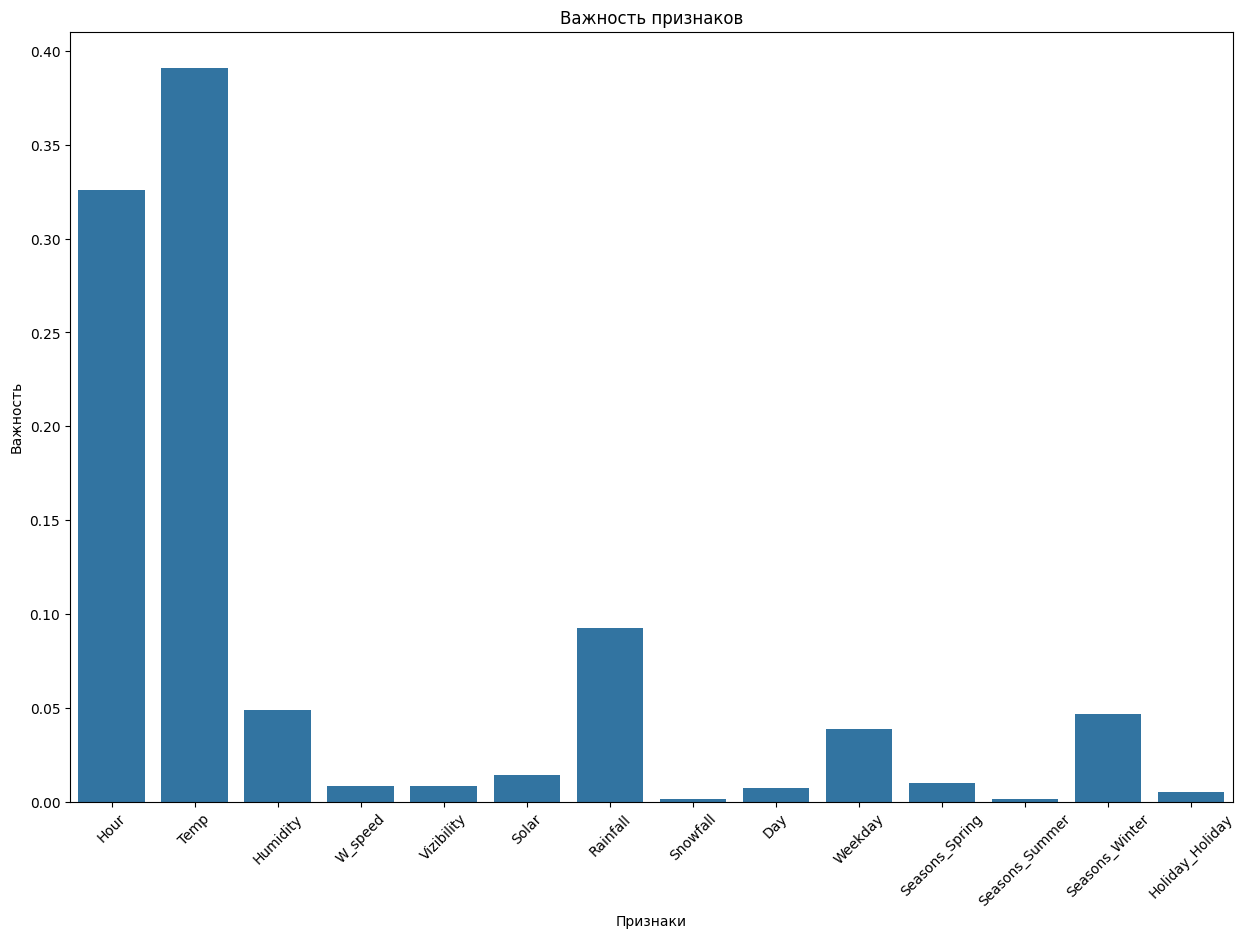

In [48]:
feature = X_train.columns #признаки
feature_importances = dt.feature_importances_ #важность признаков
plt.figure(figsize=(15, 10))

# Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances)

# Добавляем подпись графику, осям абсцисс и ординат
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.show()

In [49]:
# поработаем с наиболее важными фичами для Decision Tree
important_features = ['Hour', 'Temp', 'Humidity', 'Solar', 'Rainfall', 'Weekday', 'Seasons_Winter', 'Seasons_Spring']
X_train_short = X_train[important_features]
X_test_short = X_test[important_features]

In [52]:
dtsh = tree.DecisionTreeRegressor(
    criterion='poisson',
    random_state=42,
    splitter = 'best',
    max_depth = 14,
    min_samples_split = 7)

dtsh.fit(X_train_short, y_train)

y_pred_train = dtsh.predict(X_train_short)
y_pred = dtsh.predict(X_test_short)

print(f'лучший r2 на тренировочной выборке {r2_score(y_train, y_pred_train)}')
print(f'лучший r2 на тестовой выборке {r2_score(y_test, y_pred)}')
r2_test = r2_score(y_test, y_pred)
n_test = X_test_short.shape[0]
k = X_test_short.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)
print(f'лучший скорректированный r2 на тестовой выборке {adjusted_r2_test}')
print(f'RMSE равен {math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

лучший r2 на тренировочной выборке 0.9579913686398585
лучший r2 на тестовой выборке 0.8632613181231884
лучший скорректированный r2 на тестовой выборке 0.8627423857441493
RMSE равен 232.3856883959628


На отобранных признаках результат остается на том же уровне, даже немного хуже. Продолжим работу уже со всеми признаками

### Ансамбли. Случайный лес


In [53]:
# загружаем нужные библиотеки
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import KFold

In [54]:
# обучаем модель на случайных гиперпараметрах, далее будем их оптимизировать
# проверяем качество работы модель кросс-валидацией
rf = RandomForestRegressor(
    n_estimators=500,
    #max_depth=3,
    #max_features='sqrt',
    random_state=42
)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_metrics = cross_validate(
    estimator=rf,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2',
    return_train_score=True
)
display(cv_metrics)


print(f"Среднее качество на тренировочной выборке: {np.mean(cv_metrics['train_score']):.2f}")
print(f"Среднее качество на валидационной выборке: {np.mean(cv_metrics['test_score']):.2f}")


{'fit_time': array([16.66181517, 16.71577668, 16.83594465, 16.71038222, 16.00994992,
        15.78701305, 17.61270428, 15.72340751, 15.69261432, 15.75042534]),
 'score_time': array([0.1500001 , 0.19290352, 0.15521598, 0.15696287, 0.15451193,
        0.15388918, 0.17422533, 0.1716814 , 0.15935922, 0.15334225]),
 'test_score': array([0.9243157 , 0.932713  , 0.92214166, 0.93016569, 0.9275043 ,
        0.94746741, 0.92386391, 0.93314017, 0.91884366, 0.92407647]),
 'train_score': array([0.99019846, 0.99008627, 0.99051135, 0.98991624, 0.99056887,
        0.98998788, 0.99048857, 0.99025218, 0.99048814, 0.99040724])}

Среднее качество на тренировочной выборке: 0.99
Среднее качество на валидационной выборке: 0.93


In [55]:
# Обучаем модель на всех данных
rf.fit(X_train, y_train)

# Делаем предсказание на тесте
y_pred = rf.predict(X_test)

r2_test = r2_score(y_test, y_pred)
n_test = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)

print(f'лучший r2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'лучший скорректированный r2 на тестовой выборке {adjusted_r2_test}')
print(f'RMSE равен {math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

лучший r2 на тестовой выборке 0.9205747179890138
лучший скорректированный r2 на тестовой выборке 0.9200457199166285
RMSE равен 177.10999324140553


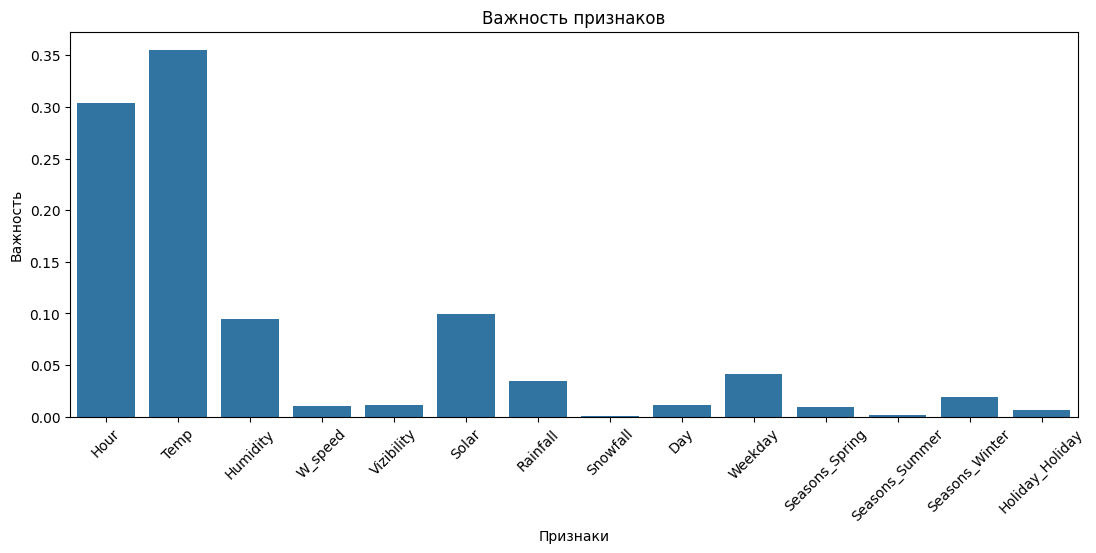

In [56]:
# посмотрим на важность признаков - аналогичная картина с простым DecisionTreeRegressor
plt.figure(figsize=(13, 5))
feature = X_train.columns
feature_importances = rf.feature_importances_
sns.barplot(x=feature, y=feature_importances);
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.show()

Важность признаков на ансамбле практически не изменилась в сравнении с  деревом решений

In [ ]:
# подберем гиперпараметры для случайного леса
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': range(5, 15),
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'min_samples_leaf': range(5, 15)
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    scoring='r2',
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)


%time grid_search.fit(X_train, y_train)

print(f"Наилучшее значение R2-score при кросс-валидации: {grid_search.best_score_}")

KeyboardInterrupt: 

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
# Grid search не справляется, используем HyperOpt

проведем подбор гиперпараметров через HyperOpt, используем пайплайны и кросс-валидацию

In [57]:
pip install hyperopt

In [58]:
from functools import partial
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [60]:
# создадим пайплайн для обработки данных:
# числовые признаки - стандартизируем, категориальные - кодируем через OneHotEncoder
reprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), make_column_selector(dtype_include=np.number)),
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), make_column_selector(dtype_include=object))
)

# создаем модель из обработчика данных и непосредствнно случайного леса
modelrf = Pipeline([('reprocessor', reprocessor),
                  ('rf', RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=500))])


In [61]:
# пространство поиска для HyperOpt
search_space = {
    'rf__n_estimators': hp.choice('n_estimators', [100, 200, 300, 400, 500]),
    'rf__max_features':  hp.choice('max_features', ['auto', 'sqrt', 'log2']),
    'rf__max_depth':  hp.choice('max_depth', range(5, 15)),
    'rf__criterion': hp.choice('criterion', ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']),
    'rf__min_samples_leaf': hp.choice('min_samples_leaf', range(5, 15))
}

In [62]:
# Зададим функцию для оптимизации. Принимает на вход гиперпараметры, модель и данные, а возвращает точность на кросс-валидации
def objective(params, pipeline,  X_train, y_train):

   # :params: гиперпараметры
   # :pipeline: модель
   # :X_train: матрица признаков
   # :y_train: значения таргета
   # :return: средняя точность на кросс-валидации


    # задаём модели требуемые параметры
    pipeline.set_params(**params)

    # задаём параметры кросс-валидации (10-фолдовая с перемешиванием)
    kf = KFold(n_splits=4, shuffle=True, random_state=42)

    # проводим кросс-валидацию
    score = cross_val_score(estimator=pipeline, X=X_train, y=y_train,
                            scoring='r2', cv=kf, n_jobs=-1)

    # возвращаем результаты, которые записываются в Trials()
    return   {'loss': -score.mean(), 'params': params, 'status': STATUS_OK}

In [63]:
# вернем в X_train, X_test все признаки до кодировки и масштабирования, так как у нас теперь есть pipeline,
# который будет обрабатывать данные для каждого фолда

X_train, X_test, y_train, y_test = train_test_split(df1.drop('RBC', axis=1), df['RBC'], random_state=42)

In [ ]:
trials = Trials()
best = fmin(
          # функция для оптимизации
            fn=partial(objective, pipeline=modelrf, X_train=X_train, y_train=y_train),
          # пространство поиска гиперпараметров
            space=search_space,
          # алгоритм поиска
            algo=tpe.rand.suggest,
          # число итераций
          # (можно ещё указать и время поиска)
            max_evals=40,
          # куда сохранять историю поиска
            trials=trials,
          # random state
            rstate=np.random.seed(),
          # progressbar
            show_progressbar=True
        )

100%|██████████| 40/40 [13:37<00:00, 20.43s/trial, best loss: -0.8915828853785299]


In [ ]:
pip install hyperopt==0.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.0/966.0 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: hyperopt
    Found existing installation: hyperopt 0.2.7
    Uninstalling hyperopt-0.2.7:
      Successfully uninstalled hyperopt-0.2.7


In [ ]:
# выводим результаты
def df_results(hp_results):

    results = pd.DataFrame([{**x, **x['params']} for x in  hp_results])
    results.drop(labels=['status', 'params'], axis=1, inplace=True)
    results.sort_values(by=['loss'], ascending=False, inplace=True)
    return results

In [ ]:
results = df_results(trials.results)
results

loss   rf__criterion  rf__max_depth rf__max_features  \
19 -0.692952         poisson              5             log2   
34 -0.695401         poisson              5             log2   
22 -0.695465  absolute_error              5             sqrt   
13 -0.699311         poisson              5             sqrt   
26 -0.743018         poisson              6             sqrt   
39 -0.745006         poisson              6             sqrt   
3  -0.756709    friedman_mse              6             log2   
9  -0.775375  absolute_error              7             log2   
7  -0.784377    friedman_mse              7             log2   
33 -0.793941  absolute_error              8             sqrt   
0  -0.793941  absolute_error              8             sqrt   
35 -0.798775  absolute_error              6             auto   
11 -0.804847    friedman_mse              8             sqrt   
10 -0.815170    friedman_mse              9             log2   
15 -0.817936  absolute_error             10             log2   
1  -0.824295    friedman_mse              9             sqrt   
23 -0.825966  absolute_error             10             log2   
20 -0.826503   squared_error              6             auto   
28 -0.826784  absolute_error             10             sqrt   
17 -0.830985         poisson             13             sqrt   
4  -0.831082    friedman_mse             13             sqrt   
38 -0.831646    friedman_mse             13             sqrt   
8  -0.833272         poisson             13             log2   
30 -0.836519   squared_error             11             sqrt   
14 -0.840842  absolute_error             14             log2   
36 -0.842448   squared_error             12             log2   
31 -0.842802         poisson             12             sqrt   
21 -0.843582    friedman_mse             13             log2   
24 -0.846957         poisson             12             log2   
18 -0.850459         poisson             11             sqrt   
37 -0.855086         poisson             14             sqrt   
32 -0.862679    friedman_mse             14             log2   
6  -0.862679    friedman_mse             14             log2   
27 -0.877415   squared_error              8             auto   
16 -0.878356         poisson             10             auto   
5  -0.889523   squared_error             12             auto   
12 -0.890176    friedman_mse             10             auto   
2  -0.890596    friedman_mse              9             auto   
29 -0.890790    friedman_mse             11             auto   
25 -0.891583    friedman_mse             12             auto   

    rf__min_samples_leaf  rf__n_estimators  
19                    11               200  
34                     6               100  
22                    10               100  
13                     7               400  
26                     6               300  
39                     7               400  
3                      5               200  
9                      6               100  
7                      9               200  
33                    14               200  
0                     14               200  
35                    11               100  
11                    12               500  
10                    14               400  
15                    13               100  
1                      9               500  
23                     9               200  
20                    13               300  
28                     8               100  
17                    14               100  
4                     13               100  
38                    13               200  
8                     14               300  
30                    10               100  
14                     9               200  
36                    10               500  
31                    10               300  
21                    10               400  
24                     8               100  
18                     6         

In [64]:
# обучаем модель на подобранных гиперпараметрах
rf_final = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    max_features='auto',
    min_samples_leaf = 11,
    criterion = 'friedman_mse',
    random_state=42
)

modelrffinal = Pipeline([('reprocessor', reprocessor),
                  ('rf', rf_final)])

modelrffinal.fit(X_train, y_train)

y_pred = modelrffinal.predict(X_test)
r2_test = r2_score(y_test, y_pred)
n_test = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)

print(f'лучший r2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'лучший скорректированный r2 на тестовой выборке {adjusted_r2_test}')
print(f'RMSE равен {math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

лучший r2 на тестовой выборке 0.8961296013833849
лучший скорректированный r2 на тестовой выборке 0.895537184661237
RMSE равен 202.53942973753


### Градиентный бустинг

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    learning_rate=0.01, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3,
    random_state=42
)

# создаем модель из обработчика данных и градиентного бустинга
modelgb = Pipeline([('reprocessor', reprocessor),
                  ('gb', gb)])


# задаём параметры кросс-валидации (10-фолдовая с перемешиванием)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# проводим кросс-валидацию
score = cross_validate(estimator=modelgb, X=X_train, y=y_train,
                        scoring='r2', cv=kf, n_jobs=-1)

display(score)

{'fit_time': array([4.08208799, 3.74271917, 4.96250486, 5.02725863]),
 'score_time': array([0.02362227, 0.04515839, 0.06139183, 0.04874539]),
 'test_score': array([0.72850296, 0.73685174, 0.73217953, 0.7285746 ])}

In [69]:
print(f"Среднее качество на валидационной выборке: {np.mean(score['test_score']):.2f}")

Среднее качество на валидационной выборке: 0.73


In [70]:
modelgb.fit(X_train, y_train)

y_pred = modelgb.predict(X_test)
r2_test = r2_score(y_test, y_pred)
n_test = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)

print(f'лучший r2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'лучший скорректированный r2 на тестовой выборке {adjusted_r2_test}')
print(f'RMSE равен {math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

лучший r2 на тестовой выборке 0.7388631624214408
лучший скорректированный r2 на тестовой выборке 0.737373788823084
RMSE равен 321.14247783127445


In [73]:
# качество модели не устраивает, займемся подбором гиперпараметров через HyperOpt
# создаем модель из обработчика данных и градиентного бустинга
modelgb1 = Pipeline([('reprocessor', reprocessor),
                  ('gb1', GradientBoostingRegressor(random_state=42))])

In [79]:
# пространство поиска для HyperOpt
search_space = {
    'gb1__n_estimators': hp.choice('n_estimators', [100, 200, 300, 400, 500]),
    'gb1__learning_rate':  hp.choice('learning_rate', np.linspace(0, 0.5, 15)),
    'gb1__max_depth':  hp.choice('max_depth', range(3, 15)),
    'gb1__criterion': hp.choice('criterion', ['friedman_mse', 'squared_error']),
    'gb1__loss': hp.choice('loss', ['squared_error', 'absolute_error', 'huber', 'quantile'])
}

In [80]:
# Зададим функцию для оптимизации. Принимает на вход гиперпараметры, модель и данные, а возвращает точность на кросс-валидации
def objective(params, pipeline,  X_train, y_train):

   # :params: гиперпараметры
   # :pipeline: модель
   # :X_train: матрица признаков
   # :y_train: значения таргета
   # :return: средняя точность на кросс-валидации


    # задаём модели требуемые параметры
    pipeline.set_params(**params)

    # задаём параметры кросс-валидации (10-фолдовая с перемешиванием)
    kf = KFold(n_splits=4, shuffle=True, random_state=42)

    # проводим кросс-валидацию
    score = cross_val_score(estimator=pipeline, X=X_train, y=y_train,
                            scoring='r2', cv=kf, n_jobs=-1)

    # возвращаем результаты, которые записываются в Trials()
    return   {'loss': -score.mean(), 'params': params, 'status': STATUS_OK}

In [83]:
trials = Trials()
best = fmin(
          # функция для оптимизации
            fn=partial(objective, pipeline=modelgb1, X_train=X_train, y_train=y_train),
          # пространство поиска гиперпараметров
            space=search_space,
          # алгоритм поиска
            algo=tpe.rand.suggest,
          # число итераций
            max_evals=40,
          # куда сохранять историю поиска
            trials=trials,
          # random state
            rstate=np.random.seed(),
          # progressbar
            show_progressbar=True
        )

100%|██████████| 40/40 [37:42<00:00, 56.57s/trial, best loss: -0.9428856246411816]


In [84]:
# выводим результаты
def df_results(hp_results):

    results = pd.DataFrame([{**x, **x['params']} for x in  hp_results])
    results.drop(labels=['status', 'params'], axis=1, inplace=True)
    results.sort_values(by=['loss'], ascending=False, inplace=True)
    return results

results = df_results(trials.results)
results

loss gb1__criterion  gb1__learning_rate       gb1__loss  \
12  0.085670   friedman_mse            0.000000  absolute_error   
5   0.001081  squared_error            0.000000   squared_error   
38 -0.786103   friedman_mse            0.428571        quantile   
34 -0.802574  squared_error            0.178571        quantile   
26 -0.804267   friedman_mse            0.214286        quantile   
37 -0.850405   friedman_mse            0.071429  absolute_error   
0  -0.885748  squared_error            0.214286        quantile   
16 -0.888896  squared_error            0.107143        quantile   
39 -0.892583  squared_error            0.035714  absolute_error   
9  -0.893353  squared_error            0.178571        quantile   
33 -0.893977  squared_error            0.500000   squared_error   
20 -0.899385  squared_error            0.107143   squared_error   
22 -0.908787   friedman_mse            0.142857           huber   
13 -0.909131  squared_error            0.142857   squared_error   
35 -0.909992  squared_error            0.500000  absolute_error   
23 -0.910709  squared_error            0.464286           huber   
30 -0.912517  squared_error            0.250000           huber   
10 -0.912922  squared_error            0.392857           huber   
19 -0.915351  squared_error            0.500000           huber   
6  -0.915901  squared_error            0.464286   squared_error   
27 -0.918557  squared_error            0.500000   squared_error   
3  -0.918592   friedman_mse            0.392857           huber   
8  -0.918815   friedman_mse            0.357143  absolute_error   
31 -0.919344  squared_error            0.500000           huber   
25 -0.920239  squared_error            0.428571           huber   
28 -0.922588   friedman_mse            0.500000           huber   
29 -0.923219  squared_error            0.178571           huber   
17 -0.924899  squared_error            0.214286  absolute_error   
24 -0.925594   friedman_mse            0.178571  absolute_error   
2  -0.926030   friedman_mse            0.214286  absolute_error   
4  -0.926548   friedman_mse            0.071429   squared_error   
7  -0.926841  squared_error            0.178571  absolute_error   
18 -0.927103  squared_error            0.071429  absolute_error   
14 -0.929277  squared_error            0.214286  absolute_error   
36 -0.930046  squared_error            0.071429  absolute_error   
11 -0.931032  squared_error            0.250000           huber   
15 -0.936276   friedman_mse            0.178571   squared_error   
21 -0.937518   friedman_mse            0.321429           huber   
1  -0.941264  squared_error            0.178571           huber   
32 -0.942886  squared_error            0.107143   squared_error   

    gb1__max_depth  gb1__n_estimators  
12               9                100  
5               13                500  
38               5                400  
34               5                200  
26               5                300  
37               3                300  
0               14                100  
16              11                500  
39               5                400  
9               13                500  
33              14                500  
20               3                200  
22               3                300  
13              13                100  
35               6                300  
23              13                100  
30               3                300  
10              14                300  
19              10                100  
6               11                100  
27               5                200  
3                3                400  
8                7                200  
31               5                400  
25              11                200  
28               9                200  
29              13                500  
17              13                500  
24              10                200  
2               10                300  
4               11  

In [85]:
# обучаем модель на лучших параметрах
gb_best = GradientBoostingRegressor(
    criterion	= 'squared_error',
    loss = 'squared_error',
    learning_rate=0.107143,
    n_estimators=500,
    max_depth=8,
    random_state=42
)

modelgb_best = Pipeline([('reprocessor', reprocessor),
                  ('gb_best', gb_best)])


modelgb_best.fit(X_train, y_train)

y_pred = modelgb_best.predict(X_test)
r2_test = r2_score(y_test, y_pred)
n_test = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)

print(f'лучший r2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'лучший скорректированный r2 на тестовой выборке {adjusted_r2_test}')
print(f'RMSE равен {math.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

лучший r2 на тестовой выборке 0.9354279962526721
лучший скорректированный r2 на тестовой выборке 0.9350597148624783
RMSE равен 159.69297636447493


Выбираем модель градиентного бустинга в качестве наилучшей для прогнозирования спроса на велобайки. Финальный скорректированный R2 = 0.935, количество моделей 500, темп обучения 0.107143, max_depth=8, функция потерь - squared error, критерий качества сплита - squared error.